In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, coint
import statsmodels.api as sm

arr = np.loadtxt("prices.txt")
df  = pd.DataFrame(arr.T, 
                   index=pd.RangeIndex(arr.shape[1], name="day"), 
                   columns=[f"inst{i}" for i in range(arr.shape[0])])

# Shape & missingness
print(df.shape)
print(df.isna().sum())

# Head / tail
display(df.head(), df.tail())


(50, 1000)
inst0      0
inst1      0
inst2      0
inst3      0
inst4      0
          ..
inst995    0
inst996    0
inst997    0
inst998    0
inst999    0
Length: 1000, dtype: int64


,inst0,inst1,inst2,inst3,inst4,inst5,inst6,inst7,inst8,inst9,...,inst990,inst991,inst992,inst993,inst994,inst995,inst996,inst997,inst998,inst999
day,,,,,,,,,,,,,,,,,,,,,
0,38.25,38.11,37.90,37.64,37.70,37.67,37.60,37.60,37.70,37.56,...,32.28,32.47,32.49,32.53,32.73,33.00,32.88,32.59,32.57,32.50
1,69.06,69.98,69.56,69.39,69.71,69.90,69.62,69.57,70.04,69.81,...,49.55,50.31,49.94,50.72,50.50,50.72,50.78,51.01,50.73,50.69
2,62.08,62.39,62.82,63.26,64.04,64.37,65.54,64.89,65.13,64.86,...,48.50,48.87,48.92,48.82,49.13,49.67,49.55,49.88,50.18,49.30
3,31.80,31.74,31.57,31.56,31.42,31.01,31.72,31.75,32.06,31.92,...,33.81,34.28,34.71,34.62,34.47,34.37,34.35,33.72,34.24,33.99
4,63.01,62.49,62.74,61.85,62.02,62.22,62.07,61.81,61.48,60.87,...,42.44,42.68,42.71,42.54,42.62,42.13,41.60,41.58,41.52,41.38


,inst0,inst1,inst2,inst3,inst4,inst5,inst6,inst7,inst8,inst9,...,inst990,inst991,inst992,inst993,inst994,inst995,inst996,inst997,inst998,inst999
day,,,,,,,,,,,,,,,,,,,,,
45,28.62,28.47,28.48,28.59,28.55,28.38,28.28,28.43,28.22,28.32,...,27.82,27.70,27.34,27.42,27.60,27.57,27.61,27.45,27.29,27.09
46,72.03,72.11,72.54,73.75,74.32,75.17,75.69,76.42,75.90,76.75,...,67.67,68.36,69.08,68.55,67.30,67.43,67.96,66.92,66.85,67.39
47,24.02,24.04,23.76,23.97,24.01,24.32,24.26,24.36,24.11,23.93,...,16.47,16.20,16.18,16.18,16.20,16.06,16.10,16.22,16.00,15.95
48,76.03,76.05,75.66,75.71,75.77,75.58,76.22,75.42,75.03,74.91,...,84.22,84.00,84.25,84.58,84.44,83.25,83.26,83.37,83.32,83.70
49,27.50,27.54,27.55,27.74,27.54,27.54,27.69,27.52,27.35,27.23,...,27.75,27.78,27.77,27.86,27.82,27.50,27.41,27.45,27.54,27.91


### Chronological Train/Test Split 

In [304]:
data=np.loadtxt('prices.txt')
# This is our in-sample data
train_data = data[:-200, ]
# This is our out-of-sample data
test_data = data[-200:, :]

print(train_data.shape)
print(test_data.shape)

(800, 50)
(200, 50)


### Rolling (Walk-Forward) Validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(
    n_splits=3,
    max_train_size=None,
    test_size=100,
    gap=0,
)

for train_idx, test_idx in tscv.split(np.arange(750)):
    train, test = prices[:, train_idx], prices[:, test_idx]
    # back-test your getMyPosition() on test after fitting on train

### Top cointegrated Pairs

In [277]:
prices = np.loadtxt('prices.txt') # np.ndarray
print(prices[:3, :])

[[38.25 69.06 62.08 31.8  63.01 28.3  36.93 43.23 42.31 67.37 26.99 47.93
  27.3  52.44 49.6  50.71 57.48 27.31 36.89 32.6  48.12 33.46 75.26 66.41
  76.53 52.51 36.77 25.65 58.66 26.89 30.59 64.33 40.08 20.08 47.7  45.15
  63.24 59.15 69.56 59.59 74.39 41.3  30.05 39.53 76.07 28.62 72.03 24.02
  76.03 27.5 ]
 [38.11 69.98 62.39 31.74 62.49 28.23 37.13 42.85 41.85 68.41 26.98 47.64
  27.23 52.21 50.42 50.79 57.81 27.87 37.04 32.5  47.92 33.1  74.84 66.13
  76.8  53.06 36.59 26.13 58.99 27.21 30.56 64.47 40.75 19.75 47.8  45.18
  63.75 59.52 69.79 59.46 74.69 41.7  30.18 38.93 75.71 28.47 72.11 24.04
  76.05 27.54]
 [37.9  69.56 62.82 31.57 62.74 28.6  36.57 42.99 41.48 69.84 26.4  47.21
  27.99 52.4  51.25 50.75 57.97 27.9  37.2  32.54 47.86 32.98 73.55 65.42
  76.79 52.92 36.97 26.35 58.27 27.46 30.14 64.38 40.79 19.88 47.41 44.81
  64.21 61.11 69.73 59.93 75.14 41.14 30.09 38.17 75.56 28.48 72.54 23.76
  75.66 27.55]]


In [23]:
print(find_coint_pairs(prices, 0.05))

[(48, 49, np.float64(2.81861675907126e-05)), (33, 49, np.float64(6.596082551540992e-05)), (25, 48, np.float64(0.00040273887568966545)), (8, 34, np.float64(0.0006693879981641143)), (33, 48, np.float64(0.000960698701284484)), (33, 35, np.float64(0.0011917409320929741)), (33, 38, np.float64(0.0016860496770030613)), (33, 44, np.float64(0.0023614916464607828)), (33, 45, np.float64(0.0031469335308761826)), (33, 40, np.float64(0.003274509521759889)), (33, 46, np.float64(0.0033539068543358822)), (25, 49, np.float64(0.0036288617794409763)), (33, 36, np.float64(0.004101550379214904)), (18, 29, np.float64(0.004989130410274139)), (11, 23, np.float64(0.005176604118084467)), (18, 30, np.float64(0.007117594465041188)), (25, 36, np.float64(0.007340417404701056)), (2, 6, np.float64(0.0079986390373881)), (1, 49, np.float64(0.010597491757459884)), (26, 45, np.float64(0.013093452390792168)), (8, 12, np.float64(0.013241767020137168)), (18, 45, np.float64(0.013404635579849618)), (8, 19, np.float64(0.0142594

In [37]:
    



a, b = calculate_hedge_ratio(prices[:, 48], prices[:, 49])
print(a)
print(b)

spread = prices[:, 49] - b * prices[:, 48]

mean = np.mean(spread)

print(mean)

def compute_zscore(spread_arr: np.ndarray):
    mean = np.mean(spread_arr)
    std = np.std(spread_arr)

    z_score = (spread_arr - mean) / std

    return z_score


3.22496983496616
0.333467256193952
4.542184411701931


In [ ]:
def get_pairs_position(instrum_1: np.ndarray,
                       instrum_2: np.ndarray,
                       positions: np.ndarray,
                       idx_1: int,
                       idx_2: int,
                       entry_z: float = 2.0,
                       size: int = 10
                      ) -> np.ndarray:
    alpha, beta = calculate_intercept_hedgeratio(instrum_1, instrum_2)
    # 2) Build the spread series
    spread = np.log(instrum_1) - (beta * np.log(instrum_2) + alpha)
    z = compute_zscore(spread)[-1]
    
    if   z >  entry_z:
        positions[idx_i] = -size
        positions[idx_j] = +size
    elif z < -entry_z:
        positions[idx_i] = +size
        positions[idx_j] = -size
    else:
        positions[idx_i] = 0
        positions[idx_j] = 0
    return positions

    
    

In [278]:
arr = np.loadtxt("prices.txt")
df = pd.DataFrame(data = arr)
df.head()


def find_top_cointegrated_pairs(stock_prices_df):
    P_VALUE_CUTOFF = 0.05
    cointegration_pairs = {}

    for i in range(stock_prices_df.shape[1]):
        for j in range(i+1, stock_prices_df.shape[1]):
            # run the test and unpack only the p-value
            _, pvalue, _ = coint(stock_prices_df[i], stock_prices_df[j])
            cointegration_pairs[(i,j)] = float(pvalue)

    # now build a Series of floats, sort it, and filter
    series = pd.Series(cointegration_pairs).sort_values()
    series = series[ series < P_VALUE_CUTOFF ]

    # greedily pick non-overlapping top pairs
    all_pairs = list(series.index)
    top_pairs = []
    for pair in series.index:
        if pair in all_pairs:
            top_pairs.append(pair)
            # remove any pairs sharing either leg
            all_pairs = [p for p in all_pairs
                         if (p[0] not in pair and p[1] not in pair)]
    return top_pairs

cointegrated_pairs = find_top_cointegrated_pairs(df)

In [ ]:
### 
metrics = []
for (i,j) in cointegrated_pairs:
    beta = fit_ols(logp[i], logp[j])
    spread = logp[i] - beta*logp[j]
    metrics.append((i, j))

## Momentum Trading Strategy

In [279]:
import numpy as np

# --- global state ------------------------------------------------------------
# entry price per ticker when an EMA position was opened
ema_entry_price = {}   # { ticker_idx: entry_price }

# stop-loss threshold (e.g. 3% adverse move)
STOP_LOSS_PCT = 0.03

def get_ema_crossover_with_stop(prcSoFar: np.ndarray,
                                curr_day: int,
                                currentPos: np.ndarray,
                                fast_span: int = 12,
                                slow_span: int = 26,
                                dollar_cap: float = 10000.0
                               ) -> np.ndarray:
    """
    EMA crossover + stop-loss.  Positions are opened on crossovers,
    and closed either on opposite crossover or when price moves
    against entry by >= STOP_LOSS_PCT.
    """
    global ema_entry_price

    nInst, nt = prcSoFar.shape
    newPos = currentPos.copy()

    # precompute the two EMAs up to curr_day for each series
    α_f = 2.0 / (fast_span + 1)
    α_s = 2.0 / (slow_span + 1)

    # we only need the last two values of each EMA for each ticker:
    ema_fast_prev = prcSoFar[:, 0].copy()
    ema_slow_prev = prcSoFar[:, 0].copy()

    # iteratively roll to curr_day
    for t in range(1, curr_day + 1):
        price_t = prcSoFar[:, t]
        ema_fast_prev = α_f * price_t + (1 - α_f) * ema_fast_prev
        ema_slow_prev = α_s * price_t + (1 - α_s) * ema_slow_prev

    # now ema_fast_prev and ema_slow_prev are the EMAs at curr_day;
    # to get the “previous” EMA, we need the values at curr_day-1:
    # so run one more step back from t=0 to t=curr_day-1
    ema_fast_2 = prcSoFar[:, 0].copy()
    ema_slow_2 = prcSoFar[:, 0].copy()
    for t in range(1, curr_day):
        p = prcSoFar[:, t]
        ema_fast_2 = α_f * p + (1 - α_f) * ema_fast_2
        ema_slow_2 = α_s * p + (1 - α_s) * ema_slow_2

    ema_fast_prev2 = ema_fast_2   # at t = curr_day-1
    ema_slow_prev2 = ema_slow_2

    # now loop over instruments and apply stop-loss and crossover logic
    price_now = prcSoFar[:, curr_day]
    for i in range(nInst):
        pos0 = currentPos[i]
        entry = ema_entry_price.get(i, None)

        # 1) if we have an existing position, check stop-loss first
        if pos0 != 0 and entry is not None:
            if pos0 > 0:
                # long: stop if price <= entry * (1 - STOP_LOSS_PCT)
                if price_now[i] <= entry * (1 - STOP_LOSS_PCT):
                    newPos[i] = 0
                    del ema_entry_price[i]
                    continue
            else:
                # short: stop if price >= entry * (1 + STOP_LOSS_PCT)
                if price_now[i] >= entry * (1 + STOP_LOSS_PCT):
                    newPos[i] = 0
                    del ema_entry_price[i]
                    continue
            # if not stopped out, we still hold — skip to next ticker
            continue

        # 2) no open position (or it was just closed), apply crossover entry
        f0, s0 = ema_fast_prev2[i], ema_slow_prev2[i]
        f1, s1 = ema_fast_prev[i],  ema_slow_prev[i]

        # bullish crossover → open long
        if (f1 > s1) and (f0 <= s0):
            size = int(dollar_cap / price_now[i])
            newPos[i] = size
            ema_entry_price[i] = price_now[i]

        # bearish crossover → open short
        elif (f1 < s1) and (f0 >= s0):
            size = int(dollar_cap / price_now[i])
            newPos[i] = -size
            ema_entry_price[i] = price_now[i]

        # else: no change, leave it at zero or whatever default

    return newPos


In [226]:
def get_ema_crossover_positions(prcSoFar: np.ndarray,
                                curr_day: int,
                                currentPos: np.ndarray,
                                fast_span: int = 12,
                                slow_span: int = 26,
                                dollar_cap: float = 10000.0
                               ) -> np.ndarray:
    """
    Given your price history array prcSoFar (nInst × nt) and the current
    day index, update currentPos by applying a fast/slow EMA crossover:
      - on a bullish crossover (fast > slow, having just crossed up): go long
      - on a bearish crossover (fast < slow, having just crossed down): go short
      - otherwise keep whatever position was in currentPos[i]
    Positions are sized so that each new entry risks ~dollar_cap / price shares.

    Returns the updated position vector of length nInst.
    """
    nInst, nt = prcSoFar.shape
    ema_fast = np.zeros((nInst, nt), dtype=float)
    ema_slow = np.zeros((nInst, nt), dtype=float)

    # smoothing factors
    α_f = 2.0 / (fast_span + 1)
    α_s = 2.0 / (slow_span + 1)

    # initialize EMAs at t=0
    ema_fast[:, 0] = prcSoFar[:, 0]
    ema_slow[:, 0] = prcSoFar[:, 0]

    # compute EMAs
    for t in range(1, nt):
        if t in (48,49, 8,24,2,6,11,13):
            continue
        price_t = prcSoFar[:, t]
        ema_fast[:, t] = α_f * price_t + (1 - α_f) * ema_fast[:, t-1]
        ema_slow[:, t] = α_s * price_t + (1 - α_s) * ema_slow[:, t-1]

    # copy in/out positions
    newPos = currentPos.copy()

    # only evaluate cross on t-1 → t
    t0, t1 = curr_day - 1, curr_day
    for i in range(nInst):
        f0, s0 = ema_fast[i, t0], ema_slow[i, t0]
        f1, s1 = ema_fast[i, t1], ema_slow[i, t1]
        price = prcSoFar[i, t1]

        # bullish crossover → go long
        if (f1 > s1) and (f0 <= s0):
            newPos[i] = int(dollar_cap / price)

        # bearish crossover → go short
        elif (f1 < s1) and (f0 >= s0):
            newPos[i] = -int(dollar_cap / price)
        # else: leave newPos[i] unchanged

    return newPos


In [280]:
import numpy as np

# Global state to remember where we entered each momentum position
momentum_entry_price = {}   # ticker_index → entry price

# Stop‐loss threshold (e.g. 5%)
STOP_LOSS_PCT = 0.02

def get_momentum_positions_with_stop(prices: np.ndarray,
                                     lookback: int = 20,
                                     dollar_cap: float = 10_000
                                    ) -> np.ndarray:
    """
    Returns momentum positions with a stop‐loss:
     - go long if return over lookback > 0, short if < 0
     - size each at 'dollar_cap' risk
     - exit if price moves against entry by more than STOP_LOSS_PCT
    """
    global momentum_entry_price

    nInst, nt = prices.shape
    pos       = np.zeros(nInst, dtype=int)

    # Not enough history to form a momentum signal
    if nt <= lookback:
        return pos

    # Compute lookback return signal
    past  = prices[:, -1 - lookback]
    curr  = prices[:, -1]
    ret   = curr / past - 1.0

    for i in range(nInst):
        if i in (48,49, 8,24,2,6,11,13):
            continue
        
        price_i = curr[i]
        sig     = np.sign(ret[i])  # +1, 0, or -1

        # === If we have an open entry from yesterday: check stop loss ===
        
        
        
        
         momentum_entry_price:
            entry_price = momentum_entry_price[i]
            # check adverse move
            if sig > 0:
                # long: stop if price <= entry * (1 - STOP_LOSS_PCT)
                if price_i <= entry_price * (1 - STOP_LOSS_PCT):
                    # exit
                    momentum_entry_price.pop(i)
                    continue  # pos[i] = 0
            elif sig < 0:
                # short: stop if price >= entry * (1 + STOP_LOSS_PCT)
                if price_i >= entry_price * (1 + STOP_LOSS_PCT):
                    momentum_entry_price.pop(i)
                    continue
            # else, keep the position open
            pos[i] = int(sig * (dollar_cap / price_i))
            continue

        # === No existing entry: maybe open a new one ===
        if sig > 0:
            # open long
            momentum_entry_price[i] = price_i
            pos[i] = int(dollar_cap / price_i)
        elif sig < 0:
            # open short
            momentum_entry_price[i] = price_i
            pos[i] = -int(dollar_cap / price_i)
        # sig == 0 ⇒ stay flat and clear any stale entry
        else:
            momentum_entry_price.pop(i, None)

    return pos


IndentationError: unexpected indent (3234843707.py, line 45)

## Cointegration Pairs Trading Strategy

### Find top cointegrated pairs

In [281]:
from statsmodels.tsa.stattools import coint

def find_coint_pairs(prices_matrix: np.ndarray, p_value_thresh: float, n_pairs: int):
    n_days, n_instrum = prices_matrix.shape
    
    # Empty list to store cointegrated pairs
    coint_pairs = []

    for i in range(n_instrum):
        for j in range(i + 1, n_instrum):
            instrument_1_arr = prices_matrix[:, i]
            instrument_2_arr = prices_matrix[:, j]
            p_value = coint(instrument_1_arr, instrument_2_arr, method = 'aeg')[1]
            if p_value < p_value_thresh:
                coint_pairs.append((i, j, p_value))
    
    # Sort cointegrated pairs by ascending p-values
    coint_pairs.sort(key = lambda x: x[2])

    if n_pairs > len(coint_pairs):
        print("Number of pairs requested exceeds number of pairs available.")
        print("Printing all pairs that passed hypothesis test")
        return coint_pairs

    return coint_pairs[:n_pairs]

### Functions 

#### Calculate Intercept and Hedge Ratio with Linear Regression

In [282]:
def calculate_intercept_hedgeratio(instrum_1: np.ndarray, instrum_2: np.ndarray) -> tuple[float, float]:
    
    X = sm.add_constant(instrum_2)
    
    lin_model = sm.OLS(instrum_1, X)
    fit_lin_model_result = lin_model.fit()

    alpha, beta = fit_lin_model_result.params

    return alpha, beta

#### Calculate Intercept and Hedge Ratio Exponentially Weighted Moving Average Linear Regression
A moving average is just an average over the last $n$ datapoints for each given time. It will be undefined for the first $n$ datapoints in our series. Shorter moving averages will be more jumpy and less reliable, but respond to new information quickly. Longer moving averages will be smoother, but take more time to incorporate new information.

We also need to use a rolling beta, a rolling estimate of how our spread should be calculated, in order to keep all of our parameters up to date.

In [283]:
# globals per pair (or per i,j in a dict of dicts)
S_xx = 0.0   # weighted ∑ x_t^2
S_xy = 0.0   # weighted ∑ x_t * y_t
S_x  = 0.0   # weighted ∑ x_t
S_y  = 0.0   # weighted ∑ y_t
W    = 0.0   # weighted ∑ 1

λ = 0.99     # forgetting factor for β



def calculate_ewma_intercept_hedgeratio(instrum_1: np.ndarray, instrum_2: np.ndarray) -> tuple[float, float]:
    

IndentationError: expected an indented block (4005441094.py, line 13)

### Kalman Filter

In [284]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

import numpy as np
from statsmodels.tools.tools import add_constant

def kalman_beta(x: np.ndarray, y: np.ndarray, delta: float = 0.0001, Ve: float    = 0.001):
    """
    Runs the Kalman‐filter recursion (Eqs 3.5–3.13) to estimate
    time‐varying intercept (alpha) and slope (beta) of y vs x.

    Parameters
    ----------
    x    : array_like, shape (T,)
           log-prices of the independent variable (e.g. log EWA)
    y    : array_like, shape (T,)
           log-prices of the dependent variable (e.g. log EWC)
    delta: float
           state-noise parameter in (0,1).  Smaller → more smoothing.
    Ve   : float
           measurement noise variance.

    Returns
    -------
    beta : np.ndarray, shape (2, T)
           Filtered state estimates; row 0 is intercept α_t, row 1 is slope β_t.
    yhat : np.ndarray, shape (T,)
           One‐step‐ahead predictions of y.
    e    : np.ndarray, shape (T,)
           Prediction errors (y_t − yhat_t).
    Q    : np.ndarray, shape (T,)
           Predicted measurement variance at each t.
    """
    T = len()


### Construct Spread

In [285]:
def construct_spread(Y, X, alpha, beta):
    spread = Y - (alpha + beta * X)
    return spread

In [286]:
def compute_zscore(spread_arr: np.ndarray):
    mean = np.mean(spread_arr)
    std = np.std(spread_arr)

    z_score = (spread_arr - mean) / std

    return z_score

In [287]:
def long_pair(curr_position_arr, stock_1, stock_2, curr_stock_1, curr_stock_2, beta):
    """
    Conduct pair trade in the long position. Go long on stock_1 and short on
    stock_2. Return new positions.
    """
    curr_position_arr[stock_1] = 75
    curr_position_arr[stock_2] = -75 * beta

    return curr_position_arr

def short_pair(curr_position_arr, stock_1, stock_2, curr_stock_1, curr_stock_2, beta):
    """
    Conduct pair trade in the short position. Go short on stock_1 and long on
    stock_2 return new positions.
    """
    curr_position_arr[stock_1] = -75
    curr_position_arr[stock_2] = 75 * beta
    
    return curr_position_arr
     

In [313]:
# initialize variable to store position of stocks the day before
global prev_positions
prev_positions = np.zeros((50,), dtype=int)


def get_coint_position(stock_prices_df, curr_day, curr_pos, stock_1_idx, stock_2_idx):
    
    stock_1_arr = stock_prices_df[stock_1_idx, :]
    stock_2_arr = stock_prices_df[stock_2_idx, :]
    alpha, beta = calculate_intercept_hedgeratio(stock_1_arr, stock_2_arr)
    spread_arr = construct_spread(stock_1_arr, stock_2_arr, alpha, beta)
    spread_mean = spread_arr.mean()
    spread_stdev = spread_arr.std()
    
    z = compute_zscore(spread_arr)

    
    
    #upper bound and lower bound for going short and long respectively
    upper_bound_spread = spread_mean + 0.5 * spread_stdev
    lower_bound_spread = spread_mean - 0.5 * spread_stdev

    curr_pair_spread = spread_arr[-1]
    curr_stock_1 = stock_1_arr[-1]
    curr_stock_2 = stock_2_arr[-1]

    if (curr_pair_spread > upper_bound_spread) and (prev_positions[stock_1_idx] >= 0):
        curr_pos = short_pair(curr_pos, stock_1_idx, stock_2_idx, curr_stock_1, curr_stock_2, beta)

        prev_positions[stock_1_idx] = curr_pos[stock_1_idx]
        prev_positions[stock_2_idx] = curr_pos[stock_2_idx]
    elif (curr_pair_spread <= lower_bound_spread) and (prev_positions[stock_1_idx] <= 0):
        curr_pos = long_pair(curr_pos, stock_1_idx, stock_2_idx, curr_stock_1, curr_stock_2, beta)

        
        prev_positions[stock_1_idx] = curr_pos[stock_1_idx]
        prev_positions[stock_2_idx] = curr_pos[stock_2_idx]
    
    else:
        curr_pos[stock_1_idx] = prev_positions[stock_1_idx]
        curr_pos[stock_2_idx] = prev_positions[stock_2_idx]

    return curr_pos

In [307]:
find_coint_pairs(prices, 0.05, 30)

[(33, 35, np.float64(0.0001437394189831871)),
 (33, 38, np.float64(0.000549057353619281)),
 (33, 44, np.float64(0.0012153034670565087)),
 (37, 49, np.float64(0.0020584795733031257)),
 (37, 41, np.float64(0.0026676080960616856)),
 (33, 41, np.float64(0.0035244006562990117)),
 (33, 48, np.float64(0.003995537216225035)),
 (37, 38, np.float64(0.005523652341080994)),
 (18, 26, np.float64(0.00584973726392756)),
 (33, 47, np.float64(0.007349459488522383)),
 (33, 40, np.float64(0.0073705380524086445)),
 (33, 34, np.float64(0.007793340257124641)),
 (37, 44, np.float64(0.008192505743497523)),
 (37, 39, np.float64(0.00936952080615663)),
 (33, 46, np.float64(0.010505698422075662)),
 (26, 38, np.float64(0.0113372618927303)),
 (37, 45, np.float64(0.01166580547523137)),
 (37, 46, np.float64(0.01237783038510805)),
 (37, 42, np.float64(0.012800655966518342)),
 (37, 40, np.float64(0.012911538027399024)),
 (16, 29, np.float64(0.013201278168165525)),
 (37, 43, np.float64(0.013582377381095039)),
 (25, 38, 

### Half-life of a mean-reversion process(our spread) / Speed of a mean reversion process

We are writing a function to calculate the half-life of a mean-reversion process under the assumption that the data follows a Ornstein-Uhlenbeck process. A Ornstein-Uhlenbeck process can be considered a continuous time analogue to to a discrete time $AR(1)$ process.
The Ornstein-Uhlenbeck process can be described using a formula:

$$
d y(t)=(\lambda y(t-1)+\mu) d t+d \varepsilon
$$

where $d \varepsilon$ is some Gaussian noise.



In [290]:
def estimate_series_halflife(spread: np.ndarray) -> float:
    """
    Estimate the mean‐reversion half‐life of a spread series via AR(1) using statsmodels,
    taking a NumPy array as input.

    Model fitted: Δs_t = k * s_{t-1} + ε_t
    half‐life = -ln(2)/k

    Parameters
    ----------
    spread : np.ndarray
        1D array of spread values (length T).

    Returns
    -------
    float
        Estimated half‐life in bars (e.g. days). Returns np.inf if k >= 0
        (i.e., non‐mean‐reverting or explosive).
    """

    # Lagged series s_{t-1} and delta series Δs_t = s_t - s_{t-1}
    spread_lag   = spread[:-1]
    delta_spread = spread[1:] - spread[:-1]

    Y = delta_spread
    X = sm.add_constant(spread_lag)

    # Fit OLS: Δs = α + k * s_lag + noise
    lin_model = sm.OLS(Y, X)
    fit_model_res = lin_model.fit()
    
    # the slope on s_{t-1}
    k = fit_model_res.params[1] 
    

    # Compute half‐life
    half_life = -np.log(2) / k

    return half_life


33 35
35.61286241727805
33 38
53.69412061087223
33 44
57.209355844872974
37 49
23.073689455914494
37 41
26.10055724138478
33 41
66.13585627162219
33 48
32.220934913664976
37 38
30.920457116147446
18 26
27.83080053634161
33 47
41.3346168257029
33 40
69.63438563002094
33 34
69.6056259839183
37 44
32.874563829253454
37 39
30.187120154957146
33 46
70.89767484194681
26 38
32.45845686769924
37 45
33.48084466566983
37 46
34.79094994751912
37 42
33.265861018450416
37 40
34.90472975075763


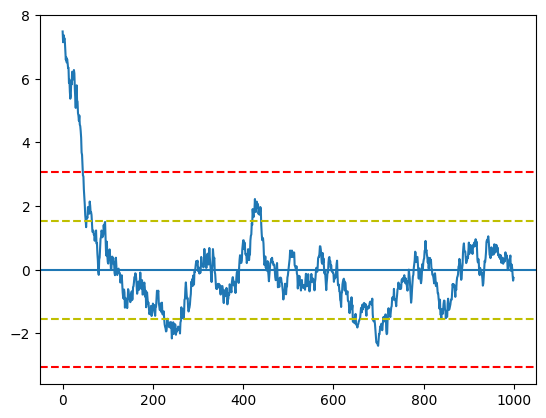

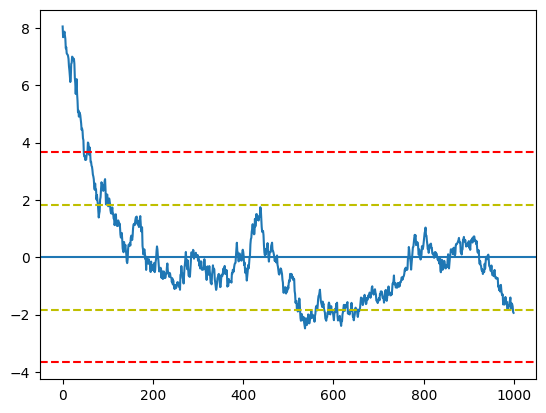

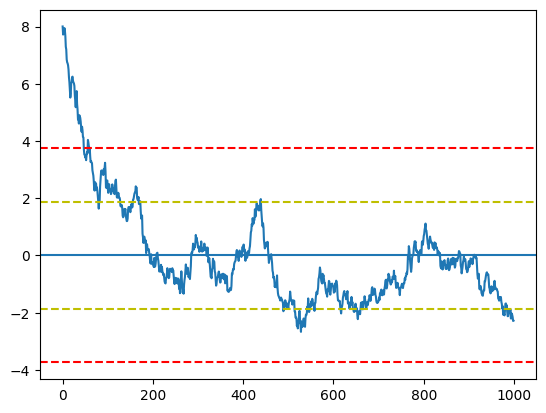

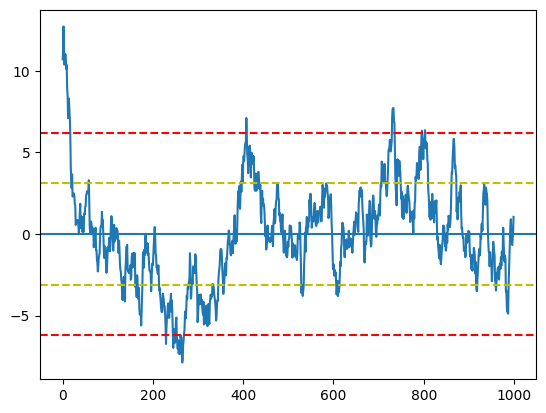

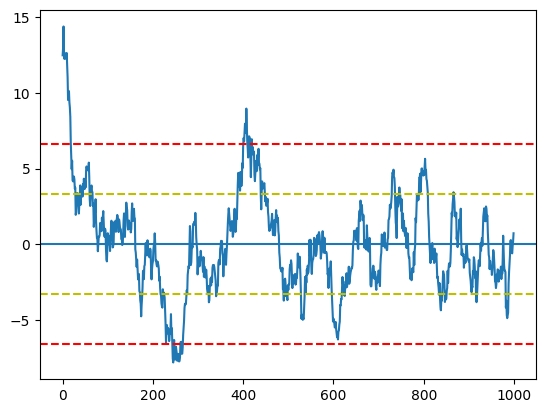

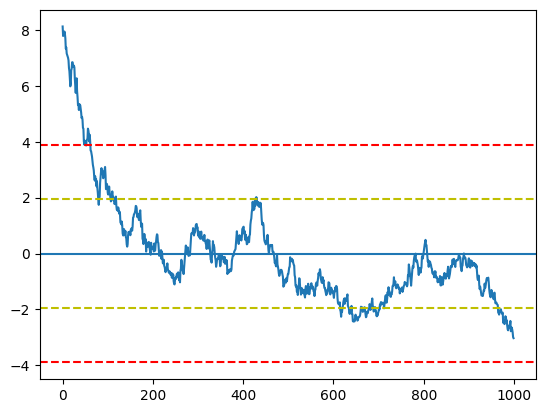

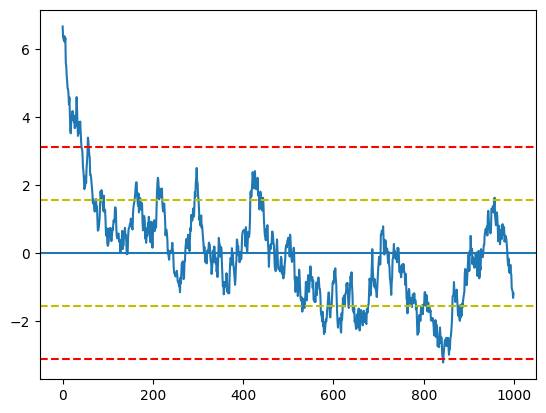

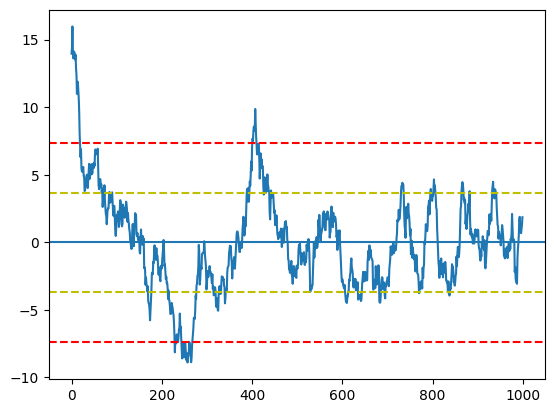

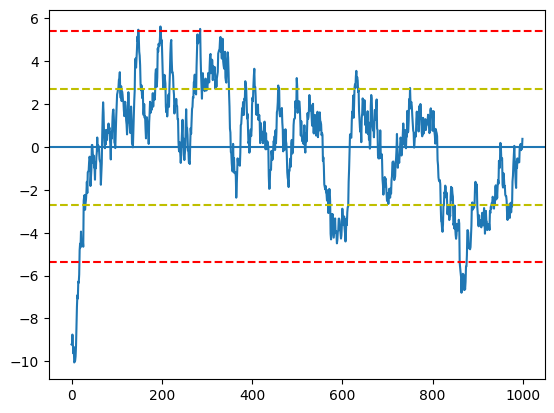

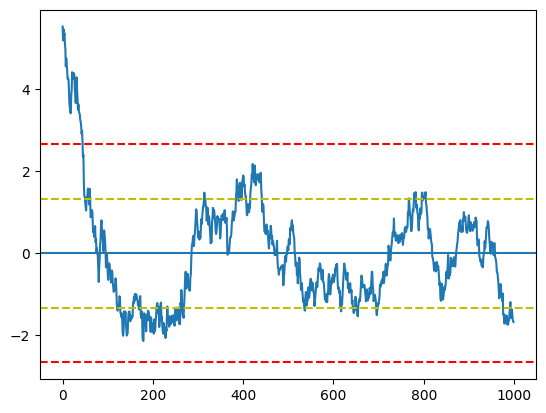

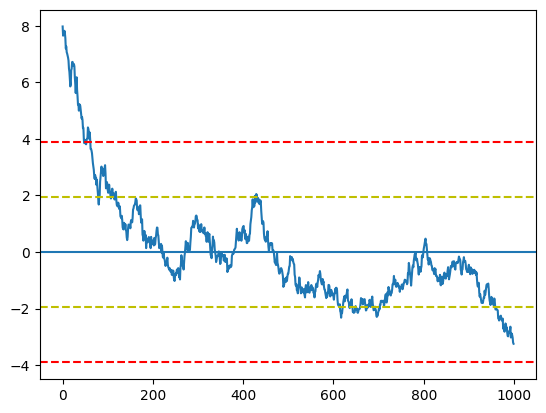

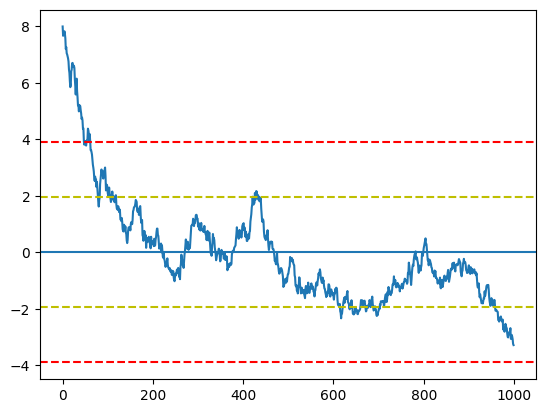

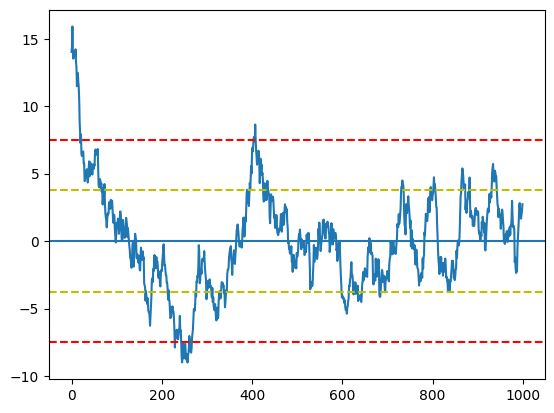

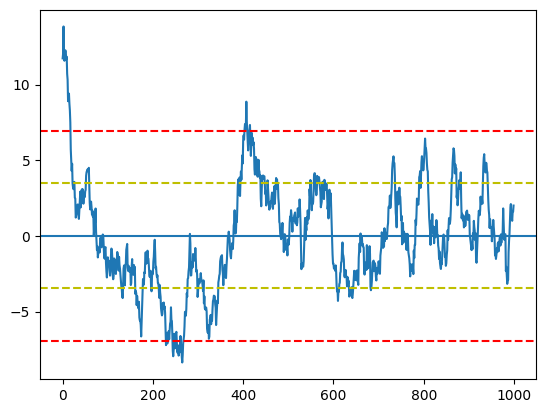

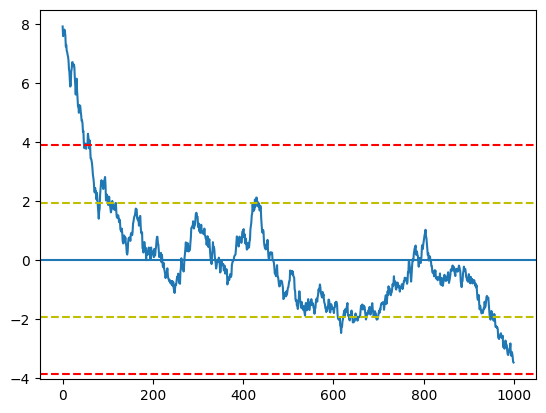

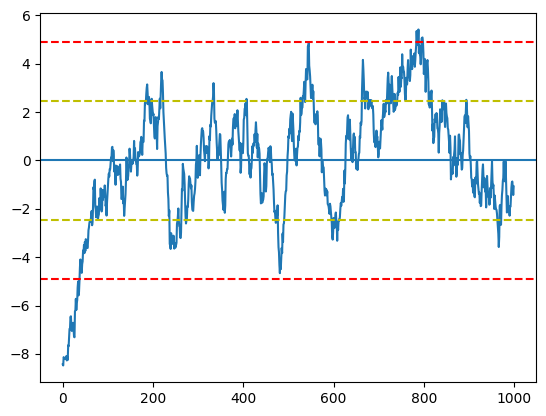

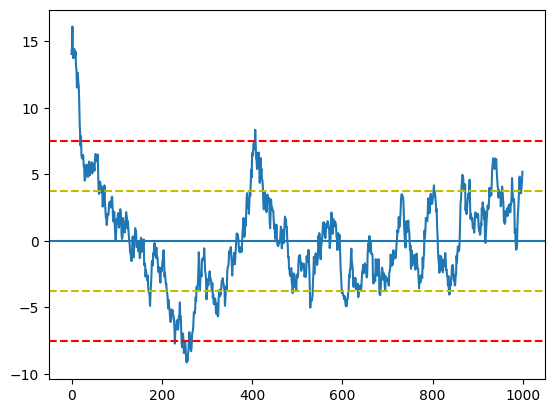

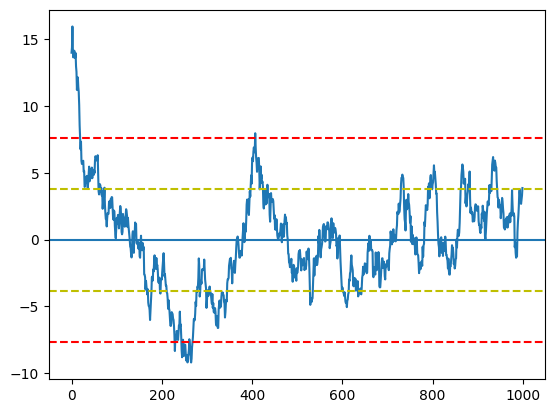

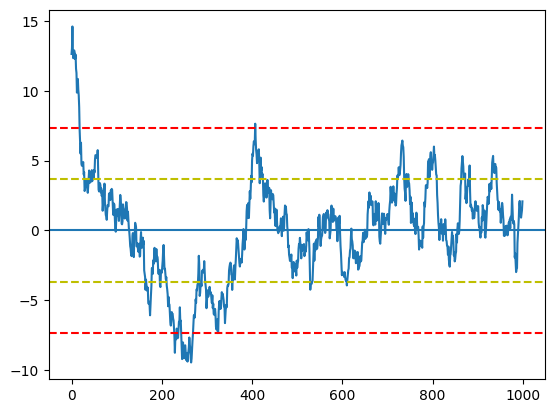

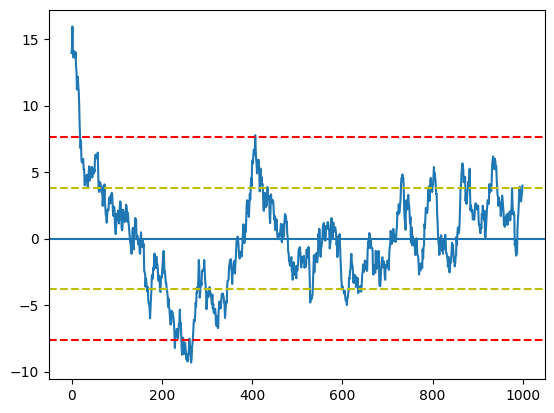

In [306]:
def plot_spread(prices, stock_1_idx, stock_2_idx):
    stock_1 = prices[:, stock_1_idx]
    stock_2 = prices[:, stock_2_idx]
    alpha, beta = calculate_intercept_hedgeratio(stock_1, stock_2)
    spread_array = construct_spread(stock_1, stock_2, alpha, beta)
    print(stock_1_idx, stock_2_idx)
    print(estimate_series_halflife(spread_array))
    fig = plt.figure()
    plt.plot(spread_array)
    plt.axhline(spread_array.mean())
    plt.axhline(spread_array.mean() + 1 * spread_array.std(), color = 'y', linestyle = '--')
    plt.axhline(spread_array.mean() - 1 * spread_array.std(), color = 'y', linestyle = '--')
    plt.axhline(spread_array.mean() + 2 * spread_array.std(), color = 'r', linestyle = '--')
    plt.axhline(spread_array.mean() - 2 * spread_array.std(), color = 'r', linestyle = '--')



top_pairs = find_coint_pairs(prices, 0.05, 20)

for s1, s2, s3 in top_pairs:
    plot_spread(prices, s1, s2)


## main.py

In [311]:

import numpy as np

##### TODO #########################################
### IMPLEMENT 'getMyPosition' FUNCTION #############
### TO RUN, RUN 'eval.py' ##########################

nInst = 50
currentPos = np.zeros(nInst)


def getPosition(prcSoFar):
    global currentPos
    nins, nt = prcSoFar.shape  # This gives (nrow, ncol). Note matrix is transposed
    # If the number of 
    if (nt < 2):
        return np.zeros(nins)
    
    #########################
    curr_day = nt -1
    current_day_arr = prcSoFar[-1, :]

    currentPos = get_coint_position(prcSoFar, curr_day, currentPos, 33, 35)
    
    currentPos = currentPos + get_coint_position(prcSoFar, curr_day, currentPos, 37, 39)

    currentPos = currentPos + get_coint_position(prcSoFar, curr_day, currentPos, 18, 26)
    
    currentPos = currentPos + get_coint_position(prcSoFar, curr_day, currentPos, 26, 38)

    mom_pos  = get_momentum_positions_with_stop(prcSoFar, lookback=20, dollar_cap=10000)
    
    # currentPos += get_ema_crossover_with_stop(prcSoFar, curr_day, currentPos, fast_span=10,  slow_span=55,  dollar_cap=10000.0)



    
    return currentPos 


## eval.py 

In [314]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
# from teamName import getMyPosition as getPosition

nInst = 0
nt = 0
commRate = 0.0005
dlrPosLimit = 10000

def loadPrices(fn):
    """
    
    """
    global nt, nInst  # global keyword inside function to declare nt & nInst global variables
    # "having fixed boundaries or limits"- delimited
    # field values delimited by spaces in our file
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None) 
    (nt,nInst) = df.shape
    # .values() method returns a np.ndarray of values (Removes index and column labels)
    # ndarray.T attribute returns view of transposed array
    return (df.values).T 

# pricesFile="./priceSlice_test.txt"
pricesFile="prices.txt"
prcAll = loadPrices(pricesFile)
# prcAll = test_data
print ("Loaded %d instruments for %d days" % (nInst, nt))

def calcPL(prcHist, numTestDays):
    cash = 0
    curPos = np.zeros(nInst)  # Array of length 50 (num of instruments) with value zero (our position)
    totDVolume = 0
    totDVolumeSignal = 0
    totDVolumeRandom = 0
    value = 0
    todayPLL = []
    (_,nt) = prcHist.shape
    startDay = nt + 1 - numTestDays  # This gives us the index of the first test day
    # Loop over all test days from 1st to last
    for t in range(startDay, nt+1):
        prcHistSoFar = prcHist[:,:t]  # History so far up until the current test day
        curPrices = prcHistSoFar[:,-1]  # Get the prices of the current day
        if (t < nt):
            # Trading, do not do it on the very last day of the test
            # Call getPosition(prcHistSoFar) having just observed day t-1’s close
            # Call our getMyPosition function to return an unclipped integer vector positions we will trade
            newPosOrig = getPosition(prcHistSoFar) 
            
            # enforce ±$10k per stock:  
            posLimits = np.array([int(x) for x in dlrPosLimit / curPrices])  # dlrPosLimit = 10000 
            # np.clip(x, a, b) forces every element x[i] to lie between a[i] and b[i].
            newPos = np.clip(newPosOrig, -posLimits, posLimits) 
            deltaPos = newPos - curPos # np.ndarray of how many shares to buy/sell
            dvolumes = curPrices * np.abs(deltaPos) # $ volume traded per instrument
            dvolume = np.sum(dvolumes) # Total $ volume of all instruments for the day
            totDVolume += dvolume  # Add the total volume for the day to total cumulative volume tracker
            comm = dvolume * commRate # Calculate commision owed in $
            cash -= curPrices.dot(deltaPos) + comm # Take commission and trades away from our cash
        else:
            newPos = np.array(curPos)
        curPos = np.array(newPos)
        posValue = curPos.dot(curPrices)
        todayPL = cash + posValue - value
        value = cash + posValue
        ret = 0.0
        if (totDVolume > 0):
            ret = value / totDVolume
        if (t > startDay):
            print ("Day %d value: %.2lf todayPL: $%.2lf $-traded: %.0lf return: %.5lf" % (t,value, todayPL, totDVolume, ret))
            todayPLL.append(todayPL)
    pll = np.array(todayPLL)
    (plmu,plstd) = (np.mean(pll), np.std(pll))
    annSharpe = 0.0
    if (plstd > 0):
        annSharpe = np.sqrt(249) * plmu / plstd
    return (plmu, ret, plstd, annSharpe, totDVolume)



(meanpl, ret, plstd, sharpe, dvol) = calcPL(prcAll,200)
score = meanpl - 0.1*plstd
print ("=====")
print ("mean(PL): %.1lf" % meanpl)
print ("return: %.5lf" % ret)
print ("StdDev(PL): %.2lf" % plstd)
print ("annSharpe(PL): %.2lf " % sharpe)
print ("totDvolume: %.0lf " % dvol)
print ("Score: %.2lf" % score)

Loaded 50 instruments for 1000 days
Day 802 value: -203.03 todayPL: $-181.17 $-traded: 44029 return: -0.00461
Day 803 value: -360.60 todayPL: $-157.57 $-traded: 44166 return: -0.00816
Day 804 value: -500.69 todayPL: $-140.09 $-traded: 44428 return: -0.01127
Day 805 value: -165.36 todayPL: $335.33 $-traded: 59622 return: -0.00277
Day 806 value: -150.54 todayPL: $14.82 $-traded: 59952 return: -0.00251
Day 807 value: -251.03 todayPL: $-100.49 $-traded: 60191 return: -0.00417
Day 808 value: -3.56 todayPL: $247.47 $-traded: 60460 return: -0.00006
Day 809 value: -15.91 todayPL: $-12.35 $-traded: 60812 return: -0.00026
Day 810 value: 186.38 todayPL: $202.29 $-traded: 60915 return: 0.00306
Day 811 value: 505.58 todayPL: $319.20 $-traded: 61338 return: 0.00824
Day 812 value: 875.36 todayPL: $369.78 $-traded: 61622 return: 0.01421
Day 813 value: 766.91 todayPL: $-108.45 $-traded: 62058 return: 0.01236
Day 814 value: 808.34 todayPL: $41.43 $-traded: 62366 return: 0.01296
Day 815 value: 556.54 tod